# Post-processing

- check number of posts per month 
- check english and removal of non-english text 
- check presence of duplicates + removal 
- random sample: at least 100 post per month 


In [50]:
import os
import json
import random
from langdetect import detect
from bs4 import BeautifulSoup
import numpy as np 
from collections import Counter
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta
import pandas as pd

# Path definition

In [62]:
folder = "/home/damn/Documents/PROJECTS/THESIS/Social-graph-miner-multi-platform-data-analysis/bluesky/dataset/100_posts/100_posts"


## 1. Number of posts 

In [63]:
# CHECK NUMERO DI POST PER MESE 

for fname in os.listdir(folder):
    if fname.endswith(".json"):
        fpath = os.path.join(folder, fname)
        with open(fpath, "r", encoding="utf-8") as f:
            data = json.load(f)
            print(f"{fname}: {len(data)} elements")


100_post_bluesky_2024-02.json: 60 elements
100_post_bluesky_2024-03.json: 114 elements
100_post_bluesky_2024-04.json: 112 elements
100_post_bluesky_2024-05.json: 121 elements
100_post_bluesky_2024-06.json: 117 elements
100_post_bluesky_2024-07.json: 148 elements
100_post_bluesky_2024-08.json: 152 elements
100_post_bluesky_2024-09.json: 181 elements
100_post_bluesky_2024-10.json: 178 elements
100_post_bluesky_2024-11.json: 233 elements
100_post_bluesky_2024-12.json: 273 elements
100_post_bluesky_2025-01.json: 263 elements
100_post_bluesky_2025-02.json: 225 elements
100_post_bluesky_2025-03.json: 266 elements
100_post_bluesky_2025-04.json: 231 elements
100_post_bluesky_2025-05.json: 253 elements
100_post_bluesky_2025-06.json: 230 elements


## 2. Duplicates

In [64]:
for fname in os.listdir(folder):
    if not fname.endswith(".json"):
        continue

    fpath = os.path.join(folder, fname)
    with open(fpath, "r", encoding="utf-8") as file:
        data = json.load(file)

    seen = set()
    duplicates = []
    unique_posts = []

    for post in data:
        post_id = post.get("uri")
        if post_id in seen:
            duplicates.append(post)
        else:
            seen.add(post_id)
            unique_posts.append(post)

    if duplicates:
        print(f"{fname}: trovati {len(duplicates)} duplicati")
    else:
        print(f"{fname}: nessun duplicato")

    # Uncomment to overwrite files without duplicates 
    # if len(unique_posts) < len(data):
    #     with open(fpath, "w", encoding="utf-8") as file:
    #         json.dump(unique_posts, file, ensure_ascii=False, indent=2)
    #     print(f"{fname}: sovrascritto con {len(unique_posts)} post unici")


100_post_bluesky_2024-02.json: nessun duplicato
100_post_bluesky_2024-03.json: nessun duplicato
100_post_bluesky_2024-04.json: nessun duplicato
100_post_bluesky_2024-05.json: nessun duplicato
100_post_bluesky_2024-06.json: nessun duplicato
100_post_bluesky_2024-07.json: nessun duplicato
100_post_bluesky_2024-08.json: nessun duplicato
100_post_bluesky_2024-09.json: nessun duplicato
100_post_bluesky_2024-10.json: nessun duplicato
100_post_bluesky_2024-11.json: nessun duplicato
100_post_bluesky_2024-12.json: nessun duplicato
100_post_bluesky_2025-01.json: nessun duplicato
100_post_bluesky_2025-02.json: nessun duplicato
100_post_bluesky_2025-03.json: nessun duplicato
100_post_bluesky_2025-04.json: nessun duplicato
100_post_bluesky_2025-05.json: nessun duplicato
100_post_bluesky_2025-06.json: nessun duplicato


# 3. Check english 

In [65]:
for fname in os.listdir(folder):
    file_path = os.path.join(folder, fname)
    with open(file_path, encoding="utf-8") as f:
        posts = json.load(f)

    english_posts = []
    for post in posts:
        lang = post.get("record").get("langs")[0]
        if lang is not None:
            is_en = (lang == "en")
        else:
            soup = BeautifulSoup(post.get("content", ""), "html.parser")
            try:
                is_en = detect(soup.get_text()) == "en"
            except:
                is_en = False

        if is_en:
            english_posts.append(post)

    # overwrite with only English posts
    with open(file_path, "w", encoding="utf-8") as f:
        json.dump(english_posts, f, ensure_ascii=False, indent=2)

    print(f"{fname}: {len(english_posts)} English posts out of {len(posts)}")


100_post_bluesky_2024-02.json: 59 English posts out of 60
100_post_bluesky_2024-03.json: 112 English posts out of 114
100_post_bluesky_2024-04.json: 111 English posts out of 112
100_post_bluesky_2024-05.json: 121 English posts out of 121
100_post_bluesky_2024-06.json: 117 English posts out of 117
100_post_bluesky_2024-07.json: 147 English posts out of 148
100_post_bluesky_2024-08.json: 152 English posts out of 152
100_post_bluesky_2024-09.json: 180 English posts out of 181
100_post_bluesky_2024-10.json: 178 English posts out of 178
100_post_bluesky_2024-11.json: 233 English posts out of 233
100_post_bluesky_2024-12.json: 273 English posts out of 273
100_post_bluesky_2025-01.json: 263 English posts out of 263
100_post_bluesky_2025-02.json: 225 English posts out of 225
100_post_bluesky_2025-03.json: 266 English posts out of 266
100_post_bluesky_2025-04.json: 230 English posts out of 231
100_post_bluesky_2025-05.json: 253 English posts out of 253
100_post_bluesky_2025-06.json: 229 English

# Hashtag extraction

In [66]:
hashtags = []

for filename in os.listdir(folder):
    file_path = os.path.join(folder, filename)
    with open(file_path, "r", encoding="utf-8") as f: 
        data = json.load(f)
        for element in data:
            if "facets" in element["record"]:
                for facet in element["record"]["facets"]:
                    # Loop through all features in each facet
                    for feature in facet["features"]:
                        if feature["$type"] == "app.bsky.richtext.facet#tag":
                            hashtags.append(feature["tag"])
                            

file = "/home/damn/Documents/PROJECTS/THESIS/Social-graph-miner-multi-platform-data-analysis/bluesky/code/hashtag/100_posts/hashtag_raw.json"
with open(file, "w", encoding="utf-8") as f:
    json.dump(hashtags, f, ensure_ascii=False, indent=2)


# Counting hashtags extracted


In [67]:
file = "/home/damn/Documents/PROJECTS/THESIS/Social-graph-miner-multi-platform-data-analysis/bluesky/code/hashtag/100_posts/hashtag_raw.json"
out  = "/home/damn/Documents/PROJECTS/THESIS/Social-graph-miner-multi-platform-data-analysis/bluesky/code/hashtag/100_posts/hashtag_norm.json"

#
with open(file, "r", encoding="utf-8") as f:
    hashtags = json.load(f)

# lowercase normalization
hashtags_nor = [tag.lower() for tag in hashtags]

# frequencies
count_ba = Counter(hashtags_nor)


with open(out, "w", encoding="utf-8") as f:
    json.dump(count_ba, f, ensure_ascii=False, indent=2)



print(f"Total hashtags: {len(hashtags_nor)}")
print(f"Unique hashtags: {len(count_ba)}")
print("Top 10:", count_ba.most_common(20))
# print("\n")
# for a in count_ba.most_common(100):
#     print(a)

Total hashtags: 11858
Unique hashtags: 3524
Top 10: [('climatechange', 3100), ('climatecrisis', 235), ('climate', 232), ('globalwarming', 196), ('environment', 143), ('climateaction', 109), ('climateemergency', 96), ('emission', 93), ('fossilfuel', 90), ('science', 83), ('sustainability', 77), ('coal', 55), ('extremeweather', 53), ('wildfires', 52), ('water', 48), ('heatwave', 48), ('nature', 45), ('renewableenergy', 42), ('drought', 41), ('pollution', 41)]


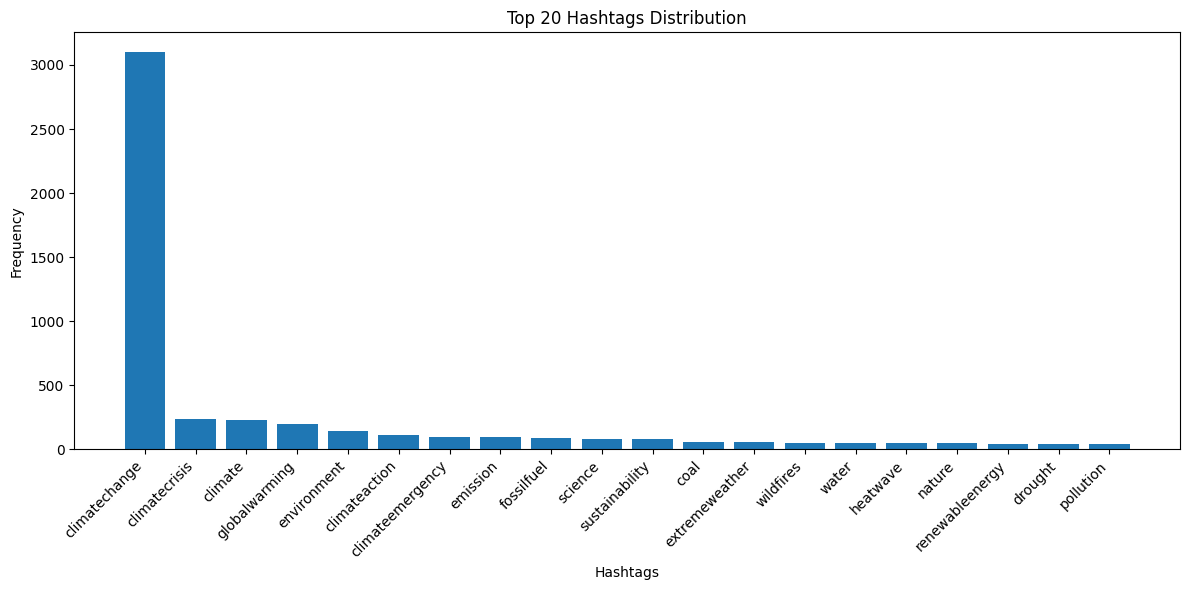

In [68]:
hashtags, freqs = zip(*count_ba.most_common(20))  
plt.figure(figsize=(12, 6))
plt.bar(hashtags, freqs)
plt.xticks(rotation=45, ha="right")
plt.title("Top 20 Hashtags Distribution")
plt.xlabel("Hashtags")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

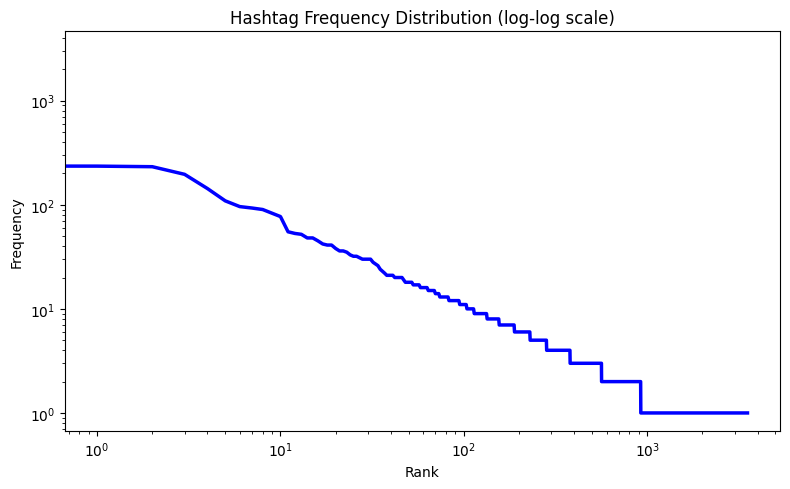

In [69]:
# Full distribution (rank vs frequency)
freqs = sorted(count_ba.values(), reverse=True)

plt.figure(figsize=(8, 5))
plt.plot(
    freqs,
    color="blue",        
    linewidth=2.5        
)
plt.yscale("log")
plt.xscale("log")
plt.title("Hashtag Frequency Distribution (log-log scale)")
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


# 1-random day data flow download 

The following codes allow to: 
- create a list of the 100 most used hashtags from the 1.5 year dataset sample 
- select a random day in the time range 
- download all the posts for such a day containing at least one of the 100 hashtags 
- compute the cumulative distribution of such hashtags 

The idea here is to retrieve the most used hashtags in a random day (cause the z-score approach showed a zipf distribution and failed to explain data). 

### 1. Creation list of 100 most used hashtags

In [70]:
in_file = "/home/damn/Documents/PROJECTS/THESIS/Social-graph-miner-multi-platform-data-analysis/bluesky/code/hashtag/100_posts/hashtag_norm.json"
out_file = "/home/damn/Documents/PROJECTS/THESIS/Social-graph-miner-multi-platform-data-analysis/bluesky/code/hashtag/100_posts/top100_hashtags.json"

with open(in_file, "r", encoding="utf-8") as f:
    hashtag_counts = json.load(f)

top100 = sorted(hashtag_counts.items(), key=lambda x: x[1], reverse=True)[:100]
top100_hashtags = [tag for tag, _ in top100]

with open(out_file, "w", encoding="utf-8") as f:
    json.dump(top100_hashtags, f, ensure_ascii=False, indent=2)

### 2. Selection of random day in time range

In [ ]:

random.seed(1)
def random_day_between(start_str, end_str):

    start_date = datetime.strptime(start_str, "%Y-%m-%d").date()
    end_date   = datetime.strptime(end_str, "%Y-%m-%d").date()

    delta_days = (end_date - start_date).days

    random_offset = random.randint(0, delta_days)
    random_date   = start_date + timedelta(days=random_offset)

    return random_date.isoformat()

START_STR = "2024-02-06"  
END_STR   = "2025-07-06" 
call = random_day_between(START_STR, END_STR)
print(call)

### 3. Adjustment of download code to retrieve the data flow of the random day 

to be run as pyhton file 

- copy the code
- adjust random day selected
- adjust output directory and best_100_hashtag file directory 
- create a .py file 
- run it 

In [ ]:
#!/usr/bin/env python3

import base64
import datetime as dt
import json
import os
import time 
import gzip
import asyncio 
import httpx
from pathlib import Path
from collections import Counter 
import requests

# Config
START          = "2025-03-09"
END            = "2025-03-09"

OUT_DIR        = Path("./bluesky/dataset/100_posts")
BEST_100_HASHTAGS = "/bluesky/code/hashtag/top100_hashtags.json"

FILTERING_LANG = "en"
LIMIT_PER_CALL = 100
MAX_RETRIES    = 3               
TOKEN_MARGIN   = 300            
MAX_CONCURRENT = 4
URL_SEARCH     = "https://bsky.social/xrpc/app.bsky.feed.searchPosts"


def _jwt_exp(jwt: str) -> float:
    try:
        _, payload_b64, _ = jwt.split(".")
        payload_b64 += "=" * (-len(payload_b64) % 4)
        payload = json.loads(base64.urlsafe_b64decode(payload_b64))
        return float(payload["exp"])
    except Exception:
        return time.time() + 7200

class TokenManager:
    def __init__(self, user: str, pw: str):
        self.user, self.pw = user, pw
        self.access: str | None = None
        self.refresh: str | None = None
        self.exp: float = 0.0
        self._create()

    @property
    def headers(self) -> dict[str, str]:
        if time.time() > self.exp - TOKEN_MARGIN:
            self._refresh()
        return {"Authorization": f"Bearer {self.access}"}

    def _create(self):
        r = requests.post(
            "https://bsky.social/xrpc/com.atproto.server.createSession",
            json={"identifier": self.user, "password": self.pw},
            timeout=15,
        )
        r.raise_for_status()
        data = r.json()
        self.access, self.refresh = data["accessJwt"], data["refreshJwt"]
        self.exp = _jwt_exp(self.access)

    def _refresh(self):
        if not self.refresh:
            self._create(); return
        r = requests.post(
            "https://bsky.social/xrpc/com.atproto.server.refreshSession",
            headers={"Authorization": f"Bearer {self.refresh}"},
            timeout=15,
        )
        if r.status_code == 401:
            self._create(); return
        r.raise_for_status()
        data = r.json()
        self.access = data["accessJwt"]
        self.refresh = data.get("refreshJwt", self.refresh)
        self.exp = _jwt_exp(self.access)




def _iso(dt_: dt.datetime) -> str:
    return dt_.strftime("%Y-%m-%dT%H:%M:%SZ")

async def _rate_limit_sleep_async(resp: httpx.Response) -> None:
    wait = 5
    retry = resp.headers.get("Retry-After")
    if retry and retry.isdigit():
        wait = int(retry)
    else:
        reset = resp.headers.get("ratelimit-reset")
        if reset and reset.isdigit():
            wait = max(0, int(reset) - int(time.time()))
    print(f"rate-limit: sleep {wait}s")
    await asyncio.sleep(wait)


async def crawl_day(tm: TokenManager, day: dt.date, outfile: Path):
    seen_uris = set()
    seen_lock = asyncio.Lock()
    sem       = asyncio.Semaphore(MAX_CONCURRENT)
    queue: asyncio.Queue[dict] = asyncio.Queue()

    async def writer():
        buffer: list[str] = []
        with gzip.open(outfile.with_suffix(".jsonl.gz"), "wt", encoding="utf-8") as fh:
            while True:
                item = await queue.get()
                if item is None:
                    break
                buffer.append(json.dumps(item, ensure_ascii=False))
                if len(buffer) >= 1000:
                    fh.write("\n".join(buffer) + "\n"); buffer.clear()
            if buffer:
                fh.write("\n".join(buffer) + "\n")

    async def fetch_word(word: str):
        cursor = None
        day_start = dt.datetime.combine(day, dt.time.min)
        day_end   = dt.datetime.combine(day, dt.time.max)
        while True:
            params = {
                "q": word,
                "lang": FILTERING_LANG,
                "since": _iso(day_start),
                "until": _iso(day_end),
                "limit": LIMIT_PER_CALL,
            }
            if cursor:
                params["cursor"] = cursor

            for attempt in range(MAX_RETRIES):
                async with sem:
                    try:
                        async with httpx.AsyncClient(timeout=25) as client:
                            resp = await client.get(URL_SEARCH, headers=tm.headers, params=params)
                        if resp.status_code in (429, 403):
                            await _rate_limit_sleep_async(resp)
                            if attempt < MAX_RETRIES - 1:
                                continue
                        resp.raise_for_status()
                        break
                    except httpx.HTTPStatusError as exc:
                        code = exc.response.status_code
                        if 500 <= code < 600 and attempt < MAX_RETRIES - 1:
                            await asyncio.sleep(2 ** attempt)
                            continue
                        print(f"{code} {exc.response.reason_phrase}; give-up word {word}")
                        return
                    except httpx.RequestError as exc:
                        print(f"{exc}; give-up word {word}")
                        return

            data   = resp.json()
            posts  = data.get("posts", [])
            cursor = data.get("cursor")

            for post in posts:
                uri = post.get("uri")
                if not uri:
                    continue
                async with seen_lock:
                    if uri in seen_uris:
                        continue
                    seen_uris.add(uri)
                await queue.put(post)

            if cursor is None or not posts:
                break

    print(f"Crawling {day} over {len(BEST_100_HASHTAGS)} most frequent hashtags")

    writer_task = asyncio.create_task(writer())
    CHUNK = 50
    for i in range(0, len(BEST_100_HASHTAGS), CHUNK):
        chunk = BEST_100_HASHTAGS[i : i + CHUNK]
        await asyncio.gather(*(fetch_word(w) for w in chunk))

    await queue.put(None)
    await writer_task
    print(f"Finished {day}: {len(seen_uris)} unique posts saved → {outfile.with_suffix('.jsonl.gz').name}")


async def main_async():
    user, pw = os.getenv("BLUESKY_USER"), os.getenv("BLUESKY_PASS")
    if not user or not pw:
        raise SystemExit("Missing BLUESKY_USER / BLUESKY_PASS in env")

    tm = TokenManager(user, pw)
    OUT_DIR.mkdir(parents=True, exist_ok=True)

    first_day = dt.datetime.strptime(START, "%Y-%m-%d").date()
    last_day  = dt.datetime.strptime(END, "%Y-%m-%d").date()

    day = first_day
    while day <= last_day:
        outfile = OUT_DIR / f"bluesky-{day}.jsonl"
        await crawl_day(tm, day, outfile)
        day += dt.timedelta(days=1)

if __name__ == "__main__":
    asyncio.run(main_async())


### 4. Hashtag retrival + plot/statistics

Adjust in/out file paths

In [71]:
in_file  = "/home/damn/Documents/PROJECTS/THESIS/Social-graph-miner-multi-platform-data-analysis/bluesky/dataset/100_posts/1_day/random_03-09.jsonl"  
out_file = "/home/damn/Documents/PROJECTS/THESIS/Social-graph-miner-multi-platform-data-analysis/bluesky/code/hashtag/1_day/hashtags.json"

hashtags = []

with open(in_file, "r", encoding="utf-8") as f:
    for line in f:
        data = json.loads(line)
        if "record" in data and "facets" in data["record"]:
            for facet in data["record"]["facets"]:
                for feature in facet.get("features", []):
                    if feature.get("$type") == "app.bsky.richtext.facet#tag":
                        hashtags.append(feature["tag"].lower())

counts = Counter(hashtags)

with open(out_file, "w", encoding="utf-8") as f:
    json.dump(counts, f, ensure_ascii=False, indent=2)

print(f"Saved {len(counts)} unique hashtags")


Saved 21434 unique hashtags


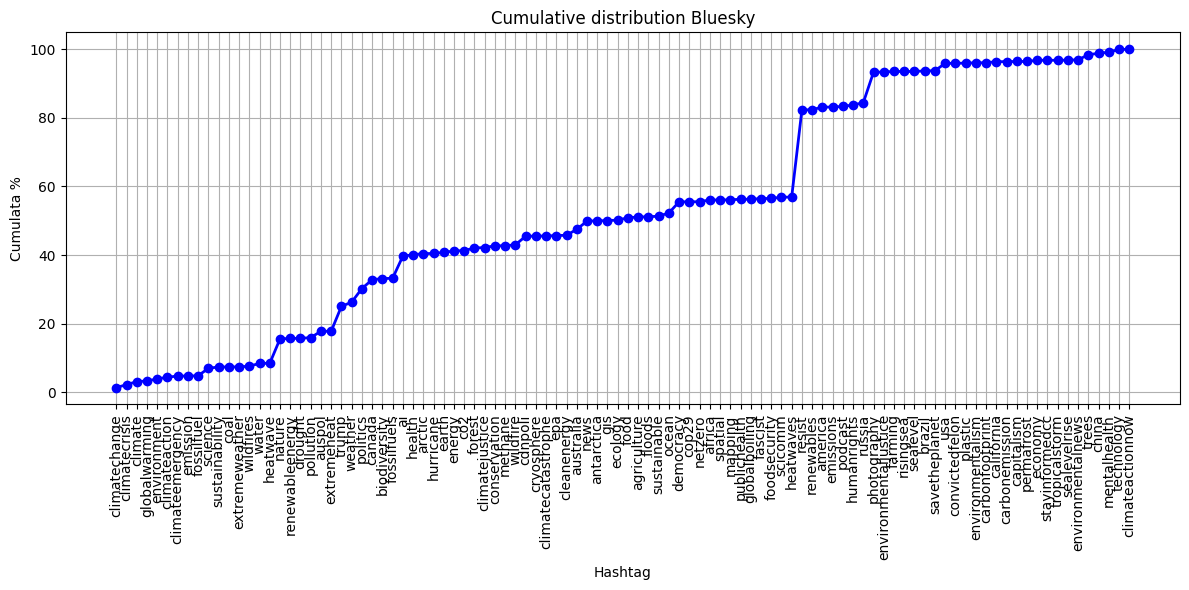

In [72]:
counts_file = "/home/damn/Documents/PROJECTS/THESIS/Social-graph-miner-multi-platform-data-analysis/bluesky/code/hashtag/1_day/hashtags.json"
top100_file = "/home/damn/Documents/PROJECTS/THESIS/Social-graph-miner-multi-platform-data-analysis/bluesky/code/hashtag/100_posts/top100_hashtags.json"
out_plot    = "/home/damn/Documents/PROJECTS/THESIS/Social-graph-miner-multi-platform-data-analysis/bluesky/code/hashtag/100_posts/top100_cumulata.png"

with open(counts_file, "r", encoding="utf-8") as f:
    all_counts = json.load(f)

with open(top100_file, "r", encoding="utf-8") as f:
    top100 = json.load(f)

# build dataframe preserving the order of the list
data = [(tag, all_counts.get(tag, 0)) for tag in top100]
df = pd.DataFrame(data, columns=["Hashtag", "Count"])

# compute cumulative %
df["Cumulata %"] = df["Count"].cumsum() / df["Count"].sum() * 100

# plot
plt.figure(figsize=(12, 6))
plt.plot(df["Hashtag"], df["Cumulata %"], marker="o", color="blue", linewidth=2)
plt.xticks(rotation=90)
plt.xlabel("Hashtag")
plt.ylabel("Cumulata %")
plt.title("Cumulative distribution Bluesky")
plt.tight_layout()
plt.grid(True)

# save
plt.savefig(out_plot)
plt.show()

